In [3]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/college-major-data/college-major-data.csv


In [4]:
majors = pd.read_csv('/kaggle/input/college-major-data/college-major-data.csv')
conn = sqlite3.connect('college-major-data.db')
majors.to_sql('majors', conn, if_exists = 'replace', index = False)

# Creating the master dataframe(un_df), the avg. unemployment per category dtaframe (cat_df), and the dataframe with all of the majors that start with 'g' (g_df)

In [5]:
qry = """
SELECT LOWER(Major) as 'Major',Major_category, Total, Unemployment_rate from majors
ORDER BY Total DESC
"""
un_df = pd.read_sql(qry, conn)
un_df.set_index('Major')
list_un = [i.lower() for i in (un_df['Major']).tolist()]

In [6]:
cat_set_g = set([i for i in un_df['Major_category']])
un_cat_dict = {}
for c in cat_set_g:
    avg = (un_df[un_df['Major_category'] == c]).mean()
    un_cat_dict[c] = avg['Unemployment_rate']
un_cat_df = pd.DataFrame(un_cat_dict, index = [0])
cat_dict = {'Avg_Unemployment_rate':[]}
cat_dict['Avg_Unemployment_rate'] = (un_cat_dict)
cat_df = pd.DataFrame(cat_dict)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [7]:
cat_set_g = set([i for i in un_df['Major_category']])
major_cat = []
un_rate = []
for c in cat_set_g:
    avg = (un_df[un_df['Major_category'] == c]).mean()
    major_cat.append(c)
    un_rate.append(avg['Unemployment_rate'])
un_cat_dict = {'Major_category':major_cat, 'Unemployment_rate':un_rate}
cat_df = pd.DataFrame(un_cat_dict)
cat_df

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """


,Major_category,Unemployment_rate
0,Humanities & Liberal Arts,0.069429
1,Law & Public Policy,0.067854
2,Health,0.047209
3,Social Science,0.065686
4,Biology & Life Science,0.049936
5,Computers & Mathematics,0.059437
6,Engineering,0.050630
7,Psychology & Social Work,0.077867
8,Education,0.046762
9,Physical Sciences,0.054541


In [8]:
g_df = un_df[un_df['Major'].str[0] == 'g']
g_df = g_df.sort_values(by = 'Major_category')
list_g = [i.lower() for i in (g_df['Major']).tolist()]

In [9]:
g_df = g_df.append({'Major': 'Average (All majors)', 'Major_category': 'Avg', 'Total': (g_df['Total'].sum()) , 'Unemployment_rate':(un_df['Unemployment_rate'].mean())}, ignore_index=True)
g_df

,Major,Major_category,Total,Unemployment_rate
0,general agriculture,Agriculture & Natural Resources,128148,0.026147
1,genetics,Biology & Life Science,6362,0.041591
2,general business,Business,2148712,0.051378
3,general education,Education,1438867,0.043904
4,general engineering,Engineering,503080,0.047688
5,geological and geophysical engineering,Engineering,6264,0.000000
6,general medical and health services,Health,104516,0.054701
7,geology and earth science,Physical Sciences,107902,0.065111
8,geosciences,Physical Sciences,8267,0.042792
9,general social sciences,Social Science,127363,0.071057


# Creating the plot(s)

A horizontal bar chart with the unemployment rate for each G major, the majors are color coded by major category. Seaborn, numpy, and matplotlib are used.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


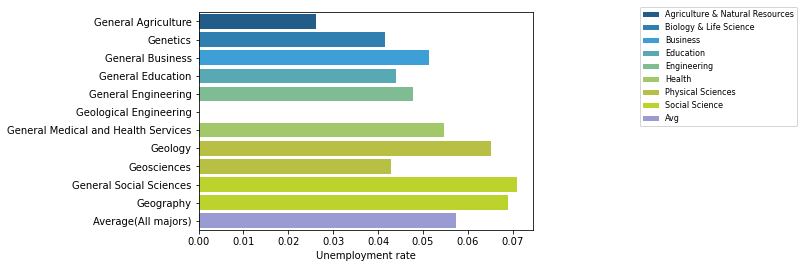

In [10]:
plt.rcParams["figure.autolayout"] = True

lav = '#9292dd'
orange = '#ff8224'
mycolors = ["#115f9a", "#1984c5", "#22a7f0", "#48b5c4", "#76c68f", "#a6d75b", "#c9d52f", "#d0ee11", lav]
sns.set_palette(sns.color_palette(mycolors))

y_indexes = np.arange(len(g_df['Major']))
width = 1.25
x_labels = [str(i)+'%' for i in (list(set([(i*100)//1 for i in g_df['Unemployment_rate']])))]
ax = sns.barplot(y = y_indexes, x = 'Unemployment_rate', hue = 'Major_category', data = g_df, orient = 'h', dodge = False)
ax.set_yticklabels(labels = ('General Agriculture','Genetics','General Business','General Education','General Engineering','Geological Engineering','General Medical and Health Services', 'Geology', 'Geosciences', 'General Social Sciences', 'Geography', 'Average(All majors)'))
#ax.set_xticklabels(labels = x_labels)
plt.rc('legend', fontsize= 8)
plt.rc('ytick', labelsize= 8)
plt.rc('xtick', labelsize= 10)
plt.rc('axes', labelsize= 10)
plt.xlabel(xlabel = 'Unemployment rate')
plt.legend(loc=5, bbox_to_anchor = (1.8,0.75))
plt.savefig('catagory_colored_barhchart')

In [46]:
majors = ['General Agriculture', 'Genetics', 'General Business', 'General Education', 'General Engineering', 'Geological Engineering', 'General Medical and Health Services', 'Geology', 'Geosciences', 'General Social Sciences', 'Geography']

Text(0.5, 0, "Total graduates for each 'G' major")

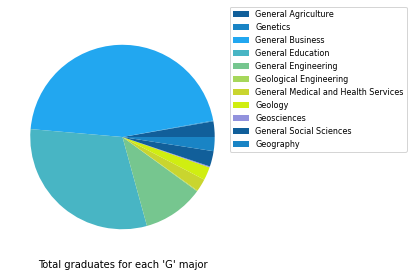

In [59]:
(g_df.drop(11)).plot.pie(x = 'Major', y = 'Total', labels = majors, labeldistance = None)
plt.legend(loc=5, bbox_to_anchor = (1.75,0.75))
plt.ylabel(ylabel = None)
plt.xlabel(xlabel = 'Total graduates for each \'G\' major')